In [32]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics

In [33]:
# df = pd.read_csv('/content/Sydney_Data.csv')
# df = pd.read_csv('/content/Adelaide_Data.csv')
df = pd.read_csv('/content/Perth_Data.csv')
# df = pd.read_csv('/content/Tasmania_Data.csv')

df.head()
# df.isnull().sum()
# df.shape
# df.describe()
# df.columns[32:]
# df.tail()

,427.0737,155.1636,476.0661,5.7677,255.523,410.5835,516.3158,47.4719,75.7125,463.0522,...,100328.8932,79696.1132,90093.0925,79395.6995,100893.8537,91116.6415,98560.67,99789.2341,78199.7899,1480707.346
0,427.4820,147.4593,474.9960,9.5407,258.2593,404.2589,524.3422,44.4009,70.4385,468.8828,...,98879.6861,82893.9171,89158.6518,80356.5067,100927.1007,89760.5631,97828.2206,99214.7876,79108.3094,1479133.940
1,423.7709,155.9451,470.8182,4.0438,253.8868,390.2231,509.0224,50.7996,72.8076,463.4203,...,100504.0370,81572.7820,89932.3496,80588.3130,100977.1693,90274.1347,97757.2251,99333.6857,79691.2458,1475814.243
2,431.8288,146.6720,466.1145,7.0164,261.3787,408.9941,521.9852,44.0360,77.5854,450.5736,...,99857.6062,82267.0302,88657.7954,79139.2437,100480.0554,91102.1702,98224.0435,100672.3076,78387.9296,1484052.684
3,437.7897,141.3579,474.3819,4.3434,256.5644,393.0113,516.1617,52.4880,66.1179,457.0365,...,99953.9882,80579.2854,88819.3409,80145.6969,100693.3759,89663.6079,97947.9575,100924.1871,80104.7240,1479350.362
4,450.8980,144.7559,475.3267,2.5512,241.1346,400.2228,510.2312,54.6467,78.7078,466.5793,...,101316.4648,77925.4484,87779.9566,81388.1816,100582.6873,91470.9832,97741.0470,100097.4638,79993.7164,1480235.758


In [34]:
corr_matrix = df.corr(
    method = 'pearson'
).abs()
# corr_matrix.head()

# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)


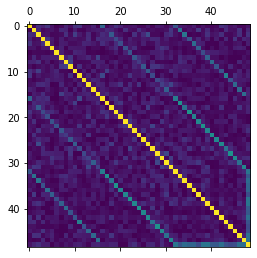

In [35]:
plt.matshow(corr_matrix)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


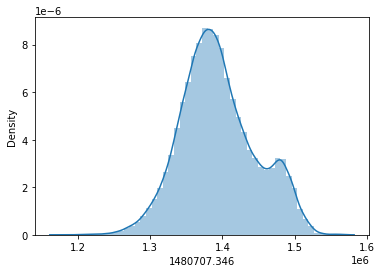

In [36]:
# Distribution of total output

sb.distplot(df.iloc[:, -1])

In [37]:
# # X = df.drop(df.iloc[:, 32:49], axis = 'columns')
# X = df.iloc[:, :32]
# # X = df.drop('1463622.174', axis='columns')
# y = df.iloc[:, -1]

In [38]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :32]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(57599, 32) (57599,)
(14400, 32) (14400,)


In [39]:
# Linear regression

from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# y_pred[-1]

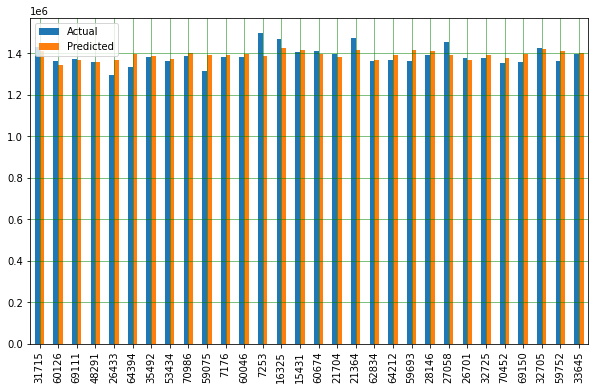

In [40]:
# plotting the comparison of actual and predicted values

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

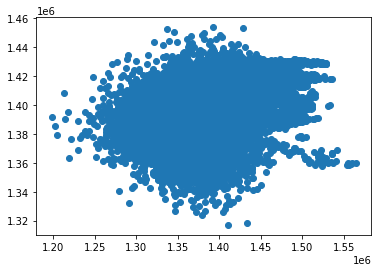

In [41]:
plt.scatter(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


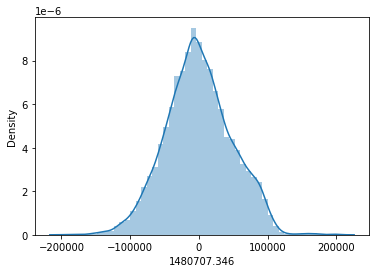

In [42]:
sb.distplot((y_test-y_pred))

In [43]:
# accuracy check

mse = mean_squared_error(y_test, y_pred)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
r2 = clf.score(X_train, y_train)

print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 
print("R²: %.2f" % r2)

MSE: 2331533562.87
RMSE: 48285.96
R²: 0.14


In [44]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                           max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg = xgb.XGBRegressor()

xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

# accuracy check
mse = mean_squared_error(y_test, preds)
rmse = mse**(0.5)
r2 = xg_reg.score(X_train, y_train)
print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

[12:27:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R²: 0.69
MSE: 856855000.14
RMSE: 29272.09


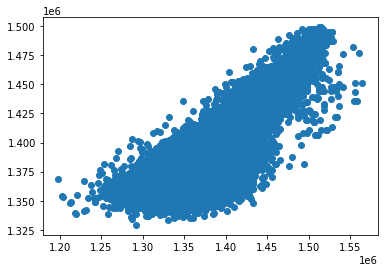

In [45]:
plt.scatter(y_test, preds)

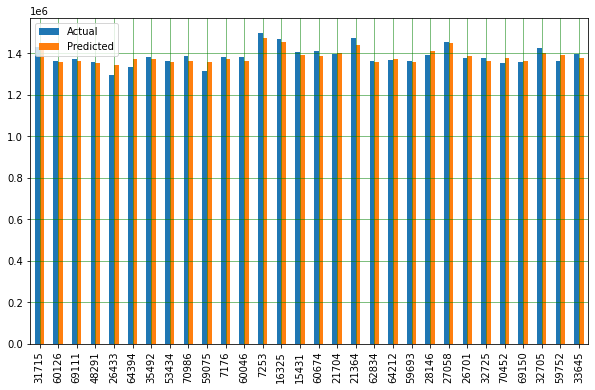

In [46]:
# plotting the comparison of actual and predicted values

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': preds})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [47]:
# Random forest

from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor(n_estimators = 10, random_state = 0)
modelRF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [48]:
# Predicting the target values of the test set
y_pred = modelRF.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = float(format(np.sqrt(mse), '.3f'))
r2 = modelRF.score(X_train, y_train)

print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

R²: 0.96
MSE: 657161482.30
RMSE: 25635.16


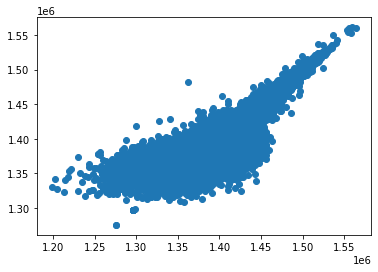

In [49]:
plt.scatter(y_test, y_pred)

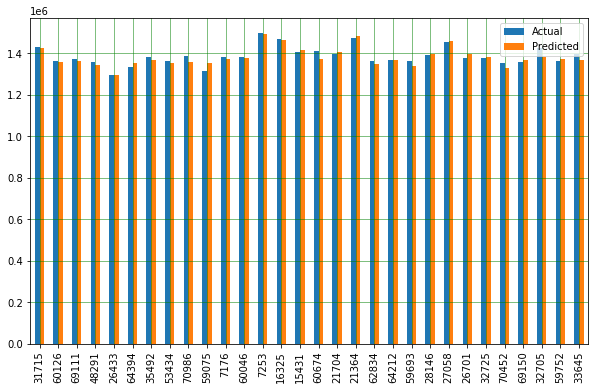

In [50]:
# plotting the comparison of actual and predicted values

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [51]:
# Light GBM

import lightgbm as lgb

# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'gbdt',
    'objective': 'regression',
    'num_leaves': 10,
    'learnnig_rage': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
modelGBM = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

# prediction
y_pred = modelGBM.predict(X_test)

[1]	valid_0's l1: 40206.9	valid_0's l2: 2.56124e+09
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's l1: 39101.7	valid_0's l2: 2.43012e+09
[3]	valid_0's l1: 38172.1	valid_0's l2: 2.3205e+09
[4]	valid_0's l1: 37296.9	valid_0's l2: 2.22124e+09
[5]	valid_0's l1: 36481.1	valid_0's l2: 2.13218e+09
[6]	valid_0's l1: 35775.5	valid_0's l2: 2.05597e+09
[7]	valid_0's l1: 34971.9	valid_0's l2: 1.96367e+09
[8]	valid_0's l1: 34308.1	valid_0's l2: 1.8925e+09
[9]	valid_0's l1: 33673.7	valid_0's l2: 1.82782e+09
[10]	valid_0's l1: 33062.7	valid_0's l2: 1.7638e+09
[11]	valid_0's l1: 32486.7	valid_0's l2: 1.70739e+09
[12]	valid_0's l1: 31931.7	valid_0's l2: 1.65181e+09
[13]	valid_0's l1: 31405.3	valid_0's l2: 1.60192e+09
[14]	valid_0's l1: 30999.8	valid_0's l2: 1.56057e+09
[15]	valid_0's l1: 30524	valid_0's l2: 1.51758e+09
[16]	valid_0's l1: 30080.1	valid_0's l2: 1.48001e+09
[17]	valid_0's l1: 29633.3	valid_0's l2: 1.44013e+09
[18]	valid_0's l1: 29233.7	valid_0's l2: 1.40478e+0

In [52]:
# accuracy check (light gbm)

from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
r2 = r2_score(y_test, y_pred)

print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

R²: 0.76
MSE: 647428302.67
RMSE: 25444.61


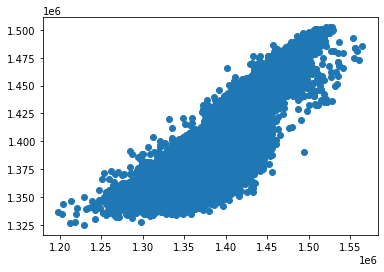

In [53]:
plt.scatter(y_test, y_pred)

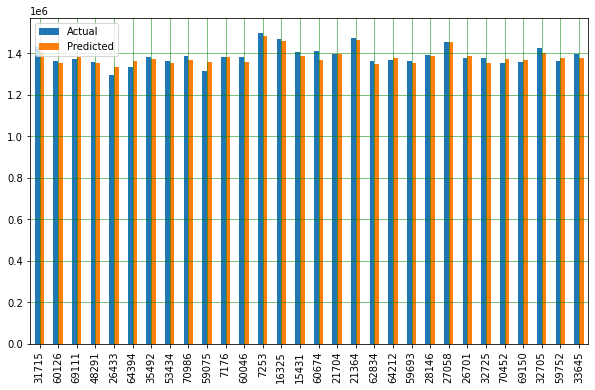

In [54]:
# plotting the comparison of actual and predicted values

df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [55]:
# MLP regressor

from sklearn.neural_network import MLPRegressor

modelMLP = MLPRegressor()
modelMLP.fit(X_train, y_train)
# print(model)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor()

In [56]:
y_pred = modelMLP.predict(X_test)
df_temp = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_temp.head()

,Actual,Predicted
31715,1430949.338,1.389887e+06
60126,1364270.624,1.299671e+06
69111,1372248.878,1.368518e+06
48291,1357292.773,1.088155e+06
26433,1296398.282,1.257550e+06


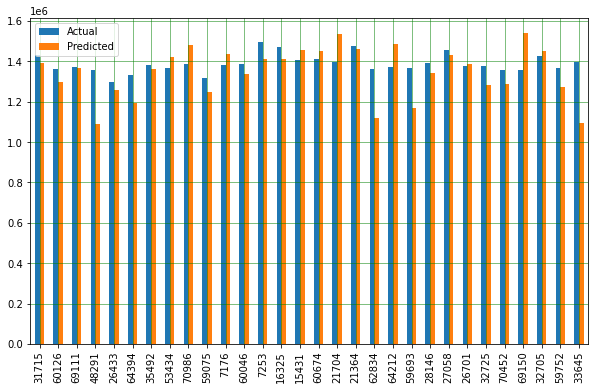

In [57]:
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [58]:
# accuracy check (MLP)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
r2 = modelMLP.score(X_train, y_train)
print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse) 

R²: -3.66
MSE: 12795483461.19
RMSE: 113117.12


In [59]:
# plt.plot(model.loss_curve_)
# plt.title("Loss Curve", fontsize=14)
# plt.xlabel('Iterations')
# plt.ylabel('Cost')
# plt.show()